# Landsat 8 - Scene Indexation

Adding satellite images (scenes) into the datacube consists of telling it where we have images in our file system. On this section we will create an index in the datacube to track Landsat 8 Scenes, this index is called a **Product** in the Open Datacube Jargon. The scene we downloaded in the previous section will be indexed into the datacube. Finally, we will retrieve the data of the indexed scene using the datacube API.

### Product

The datacube needs to know about the properties of the scenes produced for every satellite we are interested in. As every satellite takes different **measurements** (a.k.a spectral **bands**), the datacube needs to care about organizing data of the same satellite together. For this reason, for every satellite a **Product** must be defined in the datacube. To define a product we require a Product Description File.

* **Product Description File:** tells the datacube which data contains evevry scene, i.e., which bands (measurements) can be found. This metadata will be used by the datacube to create a bunch of database tables to hold relevant information about the scene that facilitates subsequent scene queries.

### Product Definition

Check if there are already products defined in the datacube. Of course you have not defined produts yet so the next command will not display information.

In [1]:
!datacube product list

Use the **product** definition file located at **../products/LS8_OLI_LASRC/description_file.yml** to define the landsat 8 product.

In [2]:
!datacube product add ../products/LS8_OLI_LASRC/description_file.yml

Adding "ls8_collections_sr_scene" (this might take a while) DONE


List the **products** created on the datacube.

In [3]:
!datacube product list

ls8_collections_sr_scene  Landsat 8 USGS Collection 1 Higher Level SR scene proessed using LaSRC. 30m UTM based projection.


### Index a scene

Satellite images (scenes) are indexed into the datacube so we are able to access such data through the datacube Python API. A scene must be prepared to be indexed in the datacube, so we require a preparation script called **Metadata Generation Script** in the open datacube jargon.

* **Metadata Generation Script (.py):** This script is used to generate a metadata file for a given scene. This metadata is used by the datacube to create indexes that easy scene data retrieval.

To keep our scenes organized, we are going to extract the .tar.gz file we have in **/data** in the **/datasets_storage** folder as shown below. All the scenes you want to index in the datacube will be placed by us in the **/datasets_storage** directory.

Verify that the scene you downloaded earlier is in the **/datasets_storage/LS8_OLI_LASRC/** directory

In [5]:
!ls -l /datasets_storage/LS8_OLI_LASRC/LC080050572017122201T1-SC20190705222048

total 1091076
-rw-r--r-- 1 datacube datacube     11360 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1.xml
-rw-r--r-- 1 datacube datacube    117248 Jan  3  2018 LC08_L1TP_005057_20171222_20180103_01_T1_ANG.txt
-rw-r--r-- 1 datacube datacube      8688 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_MTL.txt
-rw-r--r-- 1 datacube datacube 117583245 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_pixel_qa.tif
-rw-r--r-- 1 datacube datacube 117583223 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_radsat_qa.tif
-rw-r--r-- 1 datacube datacube  58822926 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_sr_aerosol.tif
-rw-r--r-- 1 datacube datacube 117583251 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_sr_band1.tif
-rw-r--r-- 1 datacube datacube 117583251 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_sr_band2.tif
-rw-r--r-- 1 datacube datacube 117583251 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_sr_band3.tif
-rw-r--r-- 1 datacube datacube

Prepare the scene so that it can be indexed by the datacube. Use the preparation script available at **../products/LS8_OLI_LASRC/mgen_script.py**

In [7]:
!python3 ../products/LS8_OLI_LASRC/mgen_script.py /datasets_storage/LS8_OLI_LASRC/LC080050572017122201T1-SC20190705222048

2020-07-27 23:46:14,911 INFO Processing /datasets_storage/LS8_OLI_LASRC/LC080050572017122201T1-SC20190705222048
2020-07-27 23:46:23,085 INFO Writing /datasets_storage/LS8_OLI_LASRC/LC080050572017122201T1-SC20190705222048/agdc-metadata.yaml


Check if the metadata file **agdc-metadata.yaml** was generated into the scene directory.

In [9]:
!ls -l /datasets_storage/LS8_OLI_LASRC/LC080050572017122201T1-SC20190705222048

total 1091080
-rw-r--r-- 1 datacube datacube     11360 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1.xml
-rw-r--r-- 1 datacube datacube    117248 Jan  3  2018 LC08_L1TP_005057_20171222_20180103_01_T1_ANG.txt
-rw-r--r-- 1 datacube datacube      8688 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_MTL.txt
-rw-r--r-- 1 datacube datacube 117583245 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_pixel_qa.tif
-rw-r--r-- 1 datacube datacube 117583223 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_radsat_qa.tif
-rw-r--r-- 1 datacube datacube  58822926 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_sr_aerosol.tif
-rw-r--r-- 1 datacube datacube 117583251 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_sr_band1.tif
-rw-r--r-- 1 datacube datacube 117583251 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_sr_band2.tif
-rw-r--r-- 1 datacube datacube 117583251 Jul  6  2019 LC08_L1TP_005057_20171222_20180103_01_T1_sr_band3.tif
-rw-r--r-- 1 datacube datacube

Now our dataset is ready for indexation. Use the following command to index your scene (also know as dataset) into the datacube.

In [11]:
!datacube dataset add /datasets_storage/LS8_OLI_LASRC/LC080050572017122201T1-SC20190705222048

Check the new data have been indexed.

In [12]:
!datacube dataset search

id: c076a33a-7b4c-474e-92b2-ea6b3c6fc964
product: ls8_collections_sr_scene
status: active
locations:
- file:///datasets_storage/LS8_OLI_LASRC/LC080050572017122201T1-SC20190705222048/agdc-metadata.yaml
fields:
    creation_time: 2017-12-22 00:00:00
    format: GeoTiff
    instrument: OLI_TIRS
    label: null
    lat: {begin: 3.282245682956571, end: 5.387626094377365}
    lon: {begin: -70.87547257296065, end: -68.82294825857863}
    platform: LANDSAT_8
    product_type: LaSRC
    time: {begin: '2017-12-22T14:54:12', end: '2017-12-22T14:54:36'}


In [13]:
%%time

import datacube

dc = datacube.Datacube(app="Hello World")

xarr = dc.load(
    # Satellite 
    product="ls8_collections_sr_scene",
    # Area to be requested 
    # latitude=(3.282245682956571,5.387626094377365),
    latitude=(3.282245682956571, 4.23180268296),
    # longitude=(-70.87547257296065, -68.82294825857863),
    longitude=(-70.87547257296065, -69.930490073),
    # The query returns the images that were obtained 
    # in the time range specified
    # Time format (YYYY-MM-DD)
    # time=("2017-12-21","2017-12-23"),
    # Image spectral bands
    measurements=['blue'],
    output_crs='EPSG:4326',
    resolution=(-0.000271302,0.000269995)
)

xarr

CPU times: user 542 ms, sys: 186 ms, total: 728 ms
Wall time: 3.45 s


<xarray.Dataset>
Dimensions:      (latitude: 3501, longitude: 3501, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2017-12-22T14:54:24
  * latitude     (latitude) float64 4.232 4.232 4.231 ... 3.283 3.283 3.282
  * longitude    (longitude) float64 -70.88 -70.88 -70.87 ... -69.93 -69.93
    spatial_ref  int32 4326
Data variables:
    blue         (time, latitude, longitude) int16 -9999 -9999 ... -9999 -9999
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

Plot the blue band of the dataset.

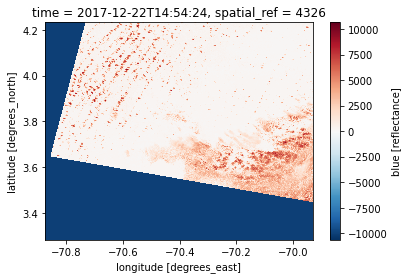

In [12]:
xarr.blue.plot()

### References

1. [Product](https://datacube-core.readthedocs.io/en/latest/architecture/data_model.html#product)
2. [Indexing Data](https://datacube-core.readthedocs.io/en/latest/ops/indexing.html#indexing-data)